<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When dealing with machine learning problems, there are generally two types of data (and machine learning models):
- Supervised data: always has one or multiple targets associated with it.
- Unsupervised data: does not have any target variable.

Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction

Reference: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem/notebook

**About this Dataset**

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Importing all the libraries needed

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

# Context

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/heart_str.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df_final=pd.read_csv("https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/heart.csv", index_col=0)
df_final.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [4]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [5]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [6]:
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


So, as we can see here the object data has been converted to string

## Getting the categorical columns

In [7]:
string_col=df.select_dtypes("string").columns.to_list()

In [8]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Exploratory Data Analysis

Out Come of this phase is as given below :

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [10]:
px.imshow(df_final.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [11]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [12]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [13]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

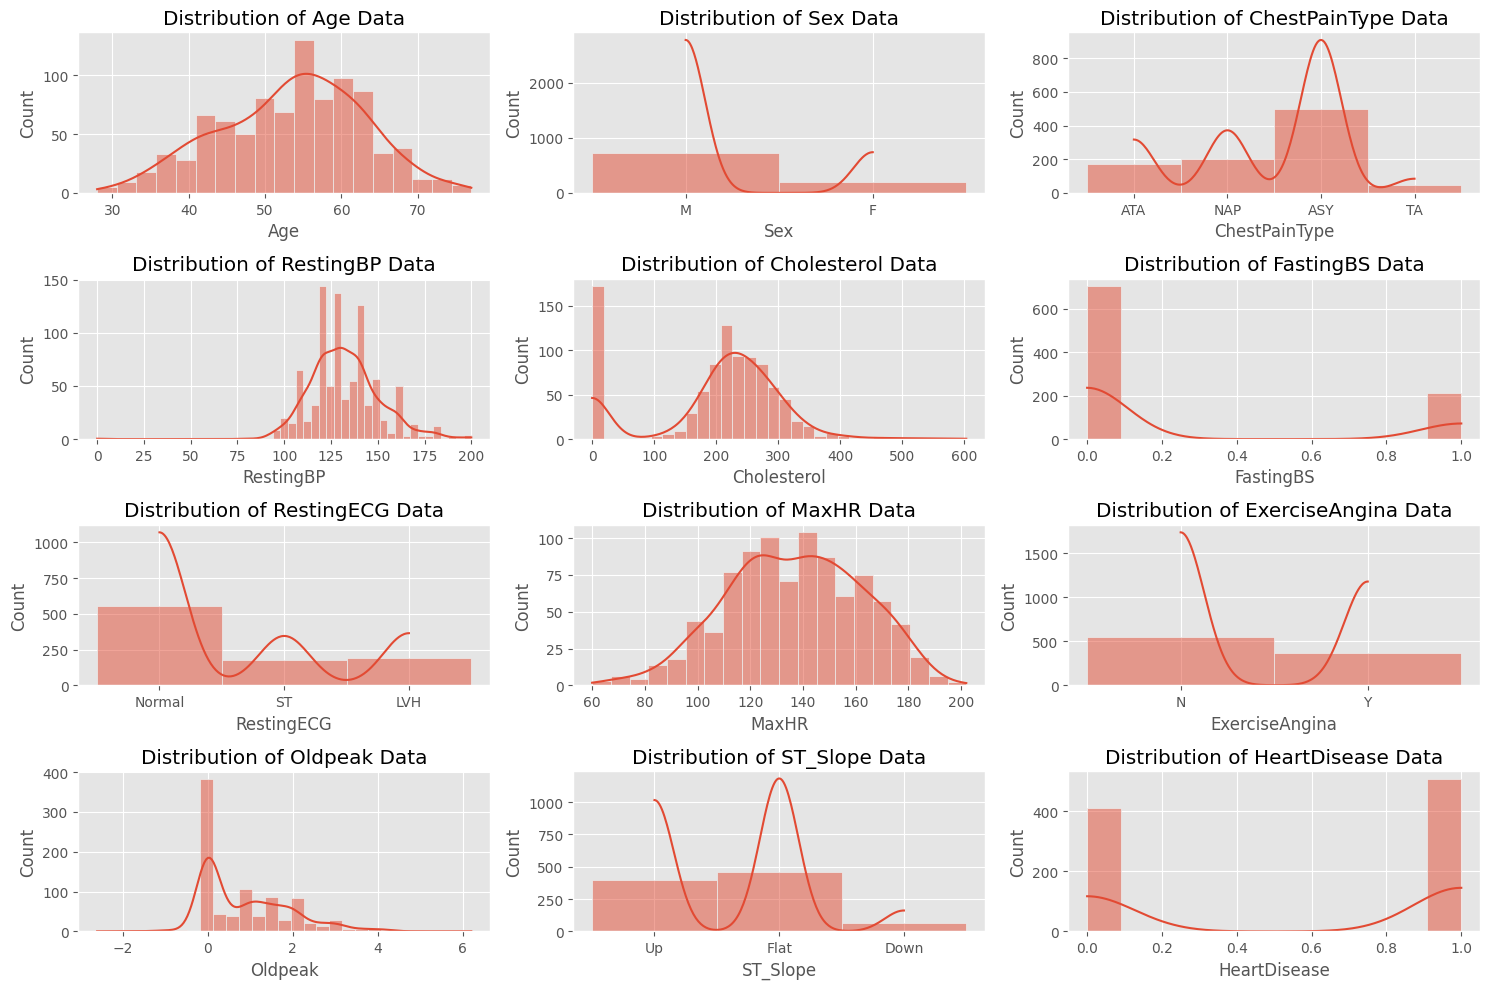

In [15]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()



# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [16]:

fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [17]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [18]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [19]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [20]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

# 1. Handling Null Values :
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.


In [21]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [22]:
# Checking for NULLs in the data
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# 2. Feature Scaling


### Why Should we Use Feature Scaling?

The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.

## Distance Based Algorithms :
    
Distance algorithms like **"KNN"**, **"K-means"** and **"SVM"** are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.
Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

<img src="https://miro.medium.com/max/1000/0*MZKG8sTIdSNv6TXB" width=50%>

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization :

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

## The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.

### Robust Scaler
When working with outliers we can use Robust Scaling for scaling our data,
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.
RobustScaler uses the interquartile range so that it is robust to outliers

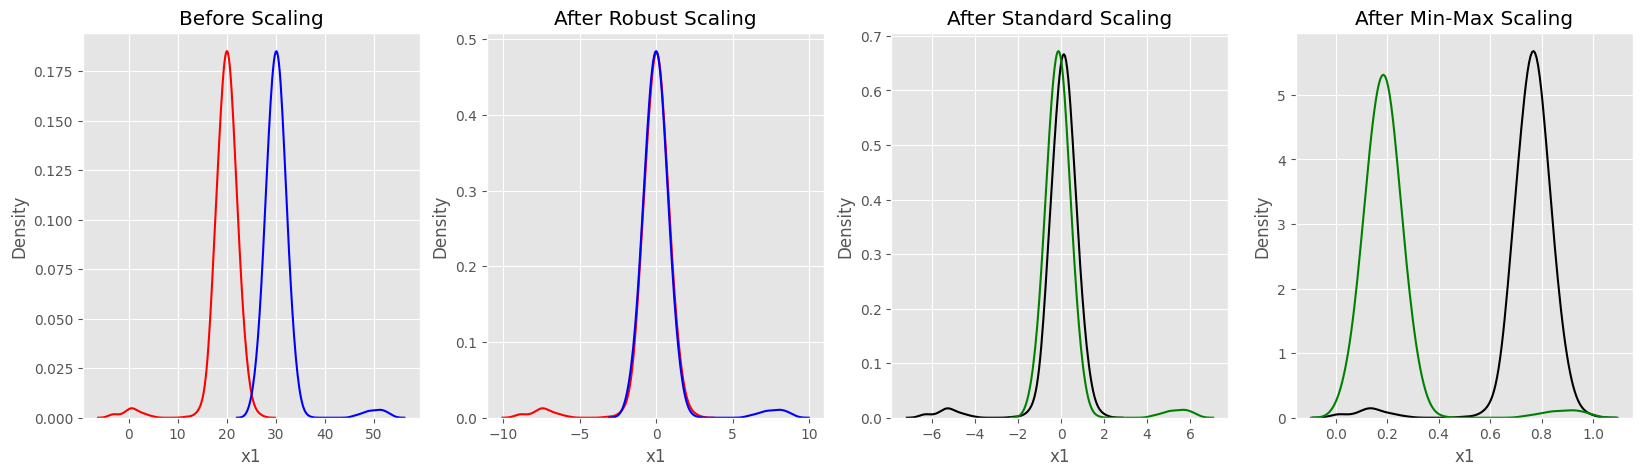

In [23]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

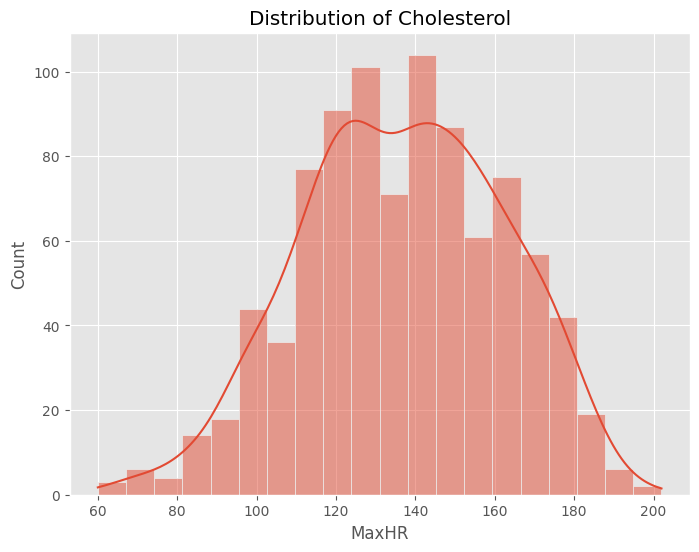

In [24]:
# prompt: plot histogram feature RestingBP kde=True

plt.figure(figsize=(8, 6))
plt.title("Distribution of Cholesterol")
sns.histplot(df['MaxHR'], kde=True)
plt.show()


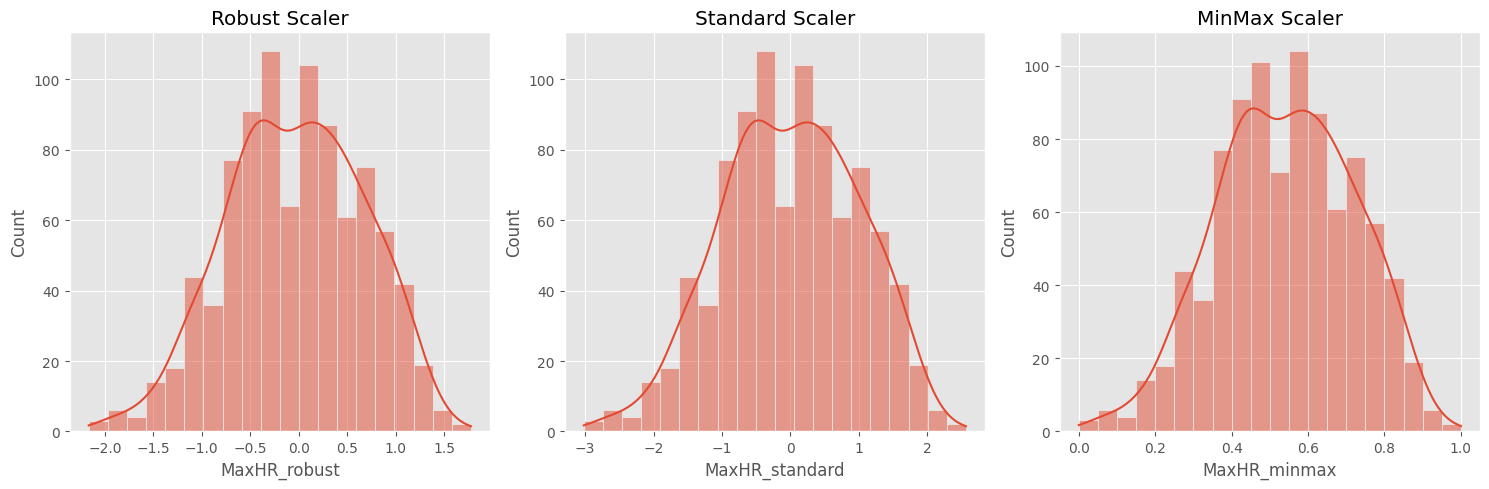

In [25]:
# prompt: histogram plot of MaxHR using three different scaling RobustScaler, StandardScaler, MinMaxScaler

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Create scaler objects
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale the 'MaxHR' column using each scaler
df['MaxHR_robust'] = robust_scaler.fit_transform(df[['MaxHR']])
df['MaxHR_standard'] = standard_scaler.fit_transform(df[['MaxHR']])
df['MaxHR_minmax'] = minmax_scaler.fit_transform(df[['MaxHR']])

# Create histograms for each scaled version
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['MaxHR_robust'], kde=True, ax=axes[0])
axes[0].set_title('Robust Scaler')

sns.histplot(df['MaxHR_standard'], kde=True, ax=axes[1])
axes[1].set_title('Standard Scaler')

sns.histplot(df['MaxHR_minmax'], kde=True, ax=axes[2])
axes[2].set_title('MinMax Scaler')

plt.tight_layout()
plt.show()


# 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:
- Nominal
- Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

It is a binary classification problem:
the target here is **not skewed** but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :
- Label Encoding
```python
from sklearn.preprocessing import LabelEncoder
```
- One Hot Encoding
```python
pd.get_dummies()
```

but we need to understand where to use which type of label encoding:

**For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding**
- The disadvantage is that the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction.

**For Tree based Machine Learning Algorithms the best way to go is with Label Encoding**

- LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2].

In [26]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [27]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR_robust,MaxHR_standard,MaxHR_minmax
0,12,1,1,41,147,0,1,98,0,10,2,0,98,98,98
1,21,0,2,55,40,0,1,82,0,20,1,1,82,82,82
2,9,1,1,31,141,0,2,25,0,10,2,0,25,25,25
3,20,0,0,39,72,0,1,34,1,25,1,1,34,34,34
4,26,1,2,49,53,0,1,48,0,10,2,0,48,48,48
